In [ ]:
from google.colab import drive
import os
from os import listdir
from os.path import isfile, join

import pandas as pd

drive.mount("/content/gdrive")
os.chdir("/content/gdrive/MyDrive/ReviewVideoSummarization")

Mounted at /content/gdrive


ValueError: ignored

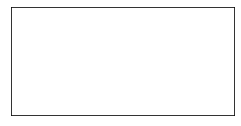

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

dataset="iphone13"
sentiment_path="sentiment/"+dataset

data = [f for f in listdir(sentiment_path) if isfile(join(sentiment_path, f))]
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(2)
counter=0
maxx=0
for t in data:
  data=pd.read_csv(sentiment_path+"/"+t, header=None)
  maxx1=np.max(data[1])
  if(maxx<maxx1):
    maxx=maxx1
  #col = np.where(data[2]=="NEGETIVE",'k')
  col = np.where(data[2]=="NEGETIVE",'r',np.where(data[2]=="POSITIVE",'r','k'))
  transparent=data[3].astype(float)
  #one_gram_keyword_score=transparent
  #print(transparent)
  for x, y, a, c in zip(data[1], data[0], transparent, col):
    plt.scatter(x, y, marker='s',s=400,color=c,alpha=a)
  #plt.scatter(data[1],data[0],marker='s',s=400,color=col,alpha=transparent)
  counter=counter+1
#plt.ylim([1,counter+1])
#plt.axis('off')
plt.yticks(np.arange(1, counter+1, 1.0))
plt.xticks(np.arange(1, maxx+1, 1.0))

#plt.grid()

plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.1 # inch margin
N=16
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.savefig('1.png', dpi=300)
#plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
#plt.rcParams["figure.figsize"] = [5,4]
#plt.rcParams["figure.autolayout"] = True

NameError: ignored

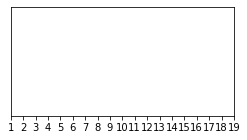

In [ ]:

keyword_path="keyword/"+dataset
keyword_data = [f for f in listdir(keyword_path) if isfile(join(keyword_path, f))]
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(2)
for t in keyword_data:
  data_k=pd.read_csv(keyword_path+"/"+t, header=None)
  transparent=data_k[2].astype(float)
  transparent=transparent/np.max(transparent)
  one_gram_keyword_score=transparent
for x, y, a in zip(data_k[1], data_k[0], transparent):
    plt.scatter(x, y, marker='s',s=400,color='b',alpha=a)
plt.yticks(np.arange(1, counter+1, 1.0))
plt.xticks(np.arange(1, maxx+1, 1.0))

#plt.grid()

plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()

plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
#maxsize = max([t.get_window_extent().width for t in tl])
m = 0.1 # inch margin
N=16
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.savefig('2.png', dpi=300)
#plt.yticks(np.arange(1, counter+1, 1.0))
#plt.xticks(np.arange(1, maxx+1, 1.0))


NameError: ignored

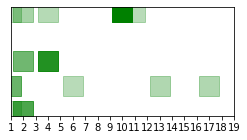

In [ ]:
keyword_path="keyword/"+dataset

f = plt.figure()
f.set_figwidth(4)
f.set_figheight(2)
data=pd.read_csv(keyword_path+"/keyword.txt", header=None)
transparent=data[3].astype(float)
transparent=transparent/np.max(transparent)
bi_gram_keyword_score=transparent
for x, y, a in zip(data[1], data[0], transparent):
    plt.scatter(x, y, marker='s',s=400,color='g',alpha=a)
plt.yticks(np.arange(1, counter+1, 1.0))
plt.xticks(np.arange(1, maxx+1, 1.0))

#plt.grid()

plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()

plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
#maxsize = max([t.get_window_extent().width for t in tl])
m = 0.1 # inch margin
N=16
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.savefig('3.png', dpi=300)
#plt.yticks(np.arange(1, counter+1, 1.0))
#plt.xticks(np.arange(1, maxx+1, 1.0))


In [ ]:
text_path="text/"+dataset

text_data = [f for f in listdir(text_path) if isfile(join(text_path, f))]
all_text=""
for t in text_data:
  with open(text_path+"/"+t) as f:
    lines=f.readlines()
  text=str(lines[0])
  text=text.split("@")

  for i in range(len(text)):
    data = text[i]
    all_text=all_text+" "+str(data)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


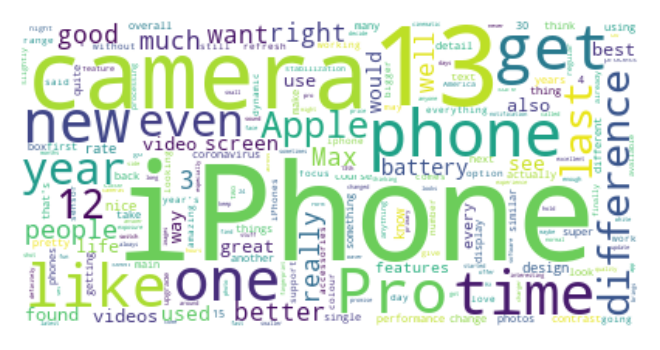

In [ ]:

from wordcloud import (WordCloud, get_single_color_func)
import matplotlib.pyplot as plt
import re

# Since the text is small collocations are turned off and text is lower-cased
#wc = WordCloud(collocations=False,background_color='#ffffff').generate(text.lower())
#convert it to dictionary with values and its occurences
from collections import Counter
#text=re.split(',|\n',text)
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
words = [word for word in all_text.split() if word.lower() not in sw_nltk]
#words = [all_words for words in words[len(words)>1]]
#print(words)
#new_text = " ".join(words)
#print(new_text)
new_text=words
word_could_dict=Counter(new_text)
wc = WordCloud(collocations=False,background_color='#ffffff',random_state=5).generate_from_frequencies(word_could_dict)

# Plot
plt.figure(figsize=(4,3), dpi=200)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
#plt.savefig('res.png', dpi=200,bbox_inches='tight')
plt.savefig('4.png', dpi=300)
plt.show()



In [ ]:
def get_segment_cloud(words,cloud):
  score=0
  for w in words:
   score=score+cloud[w]
  return score


counter=1
cloud_path="wordcloud/"+dataset+"/cloud.txt"
fh = open(cloud_path, "w+")
for t in text_data:
  segment=1
  with open(text_path+"/"+t) as f:
    lines=f.readlines()
  text=str(lines[0])
  text=text.split("@")
  for i in range(len(text)):
    data = text[i].split(' ')
    res=get_segment_cloud(data,word_could_dict)
    fh.write(str(counter)+","+str(segment)+","+str(res)+"\n")
    segment=segment+1

  counter=counter+1

In [ ]:
from pandas.errors import EmptyDataError

f = plt.figure()
f.set_figwidth(4)
f.set_figheight(2)
data=pd.read_csv(cloud_path, header=None)
transparent=data[2].astype(float)
transparent=transparent/np.max(transparent)
word_cloud_score=transparent
for x, y, a in zip(data[1], data[0], transparent):
    plt.scatter(x, y, marker='s',s=400,color='maroon',alpha=a)
plt.yticks(np.arange(1, counter, 1.0))
plt.xticks(np.arange(1, maxx+1, 1.0))

#plt.grid()

plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()

plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
#maxsize = max([t.get_window_extent().width for t in tl])
m = 0.1 # inch margin
N=16
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.savefig('5.png', dpi=300)
#plt.yticks(np.arange(1, counter+1, 1.0))
#plt.xticks(np.arange(1, maxx+1, 1.0))


EmptyDataError: ignored

<Figure size 288x144 with 0 Axes>

In [ ]:
one_gram_keyword_score=one_gram_keyword_score/np.max(one_gram_keyword_score)
bi_gram_keyword_score=bi_gram_keyword_score/np.max(bi_gram_keyword_score)
word_cloud_score=word_cloud_score/np.max(word_cloud_score)

avg_verbal_score= (one_gram_keyword_score+bi_gram_keyword_score+word_cloud_score)/3


NameError: ignored

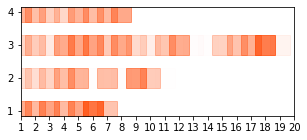

In [ ]:
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(2)
transparent=avg_verbal_score

for x, y, a in zip(data[1], data[0], transparent):
    plt.scatter(x, y, marker='s',s=400,color='orangered',alpha=a)
plt.yticks(np.arange(1, counter, 1.0))
plt.xticks(np.arange(1, maxx+1, 1.0))


#plt.grid()

plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()

plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
#maxsize = max([t.get_window_extent().width for t in tl])
m = 0.1 # inch margin
N=16
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.savefig('6.png', dpi=300)
#plt.yticks(np.arange(1, counter+1, 1.0))
#plt.xticks(np.arange(1, maxx+1, 1.0))



#print(no_of_videos)

In [ ]:

import math
activity_path="activity/"+dataset

activity_data = [f for f in listdir(activity_path) if isfile(join(activity_path, f))]
print(activity_data)
video_no=1
activity=[]
for t in activity_data:
    data=pd.read_csv(activity_path+"/"+t, header=None)
    data_hand_1=data[data[4]==1]
    data_hand_2=data[data[4]==2]
    x1=data_hand_1[2]
    y1=data_hand_1[3]
    l=len(x1)
    x2=x1
    y2=y1
    x2[1:]=x1[:l-1]
    y2[0]=y1[:l-1]
    x1=np.array(x1)
    y1=np.array(y1)
    x2=np.array(x2)
    y2=np.array(y2)
    activity_score=0
    for i in range(len(x1)-1):
      xx1=int(x1[i])
      yy1=int(y1[i])
      xx2=int(x1[i+1])
      yy2=int(y1[i+1])
      d=math.sqrt((xx1-xx2)**2+(yy1-yy2)**2)
      activity_score=activity_score+d


    x1=data_hand_2[2]
    y1=data_hand_2[3]
    l=len(x1)
    x2=x1
    y2=y1
    x2[1:]=x1[:l-1]
    y2[0]=y1[:l-1]
    x1=np.array(x1)
    y1=np.array(y1)
    x2=np.array(x2)
    y2=np.array(y2)
    activity_score=0
    for i in range(len(x1)-1):
      xx1=int(x1[i])
      yy1=int(y1[i])
      xx2=int(x1[i+1])
      yy2=int(y1[i+1])
      d=math.sqrt((xx1-xx2)**2+(yy1-yy2)**2)
      activity_score=activity_score+d


    activity.append(activity_score)
    print(t,video_no,activity_score)
    video_no=video_no+1


['1.txt', '2.txt', '3.txt', '4.txt']


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._set_values(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/li

1.txt 1 31919.48464588144
2.txt 2 99447.48374980236
3.txt 3 138849.36281195394
4.txt 4 50946.57571144469


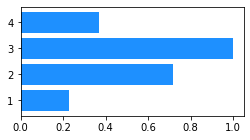

In [ ]:
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(2)
activity=activity/np.max(activity)
v=range(1,video_no)
v=np.array(v)

plt.barh(v, activity,color='dodgerblue')
plt.savefig('7.png', dpi=300)

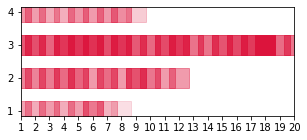

In [ ]:
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(2)
data=pd.read_csv(cloud_path, header=None)
C1=0.5
C2=0.5
ver_score=C1*avg_verbal_score
activity_score=[]
for x in data[0]:
  #print(x)
  activity_score.append(activity[x-1])
vis_score= C2*np.array(activity_score)
final_score=np.add(ver_score,vis_score)
transparent=final_score
transparent=transparent/np.max(transparent)
for x, y, a in zip(data[1], data[0], transparent):
    plt.scatter(x, y, marker='s',s=400,color='crimson',alpha=a)
plt.yticks(np.arange(1, counter, 1.0))
plt.xticks(np.arange(1, maxx+1, 1.0))

#plt.grid()

plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()

plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
#maxsize = max([t.get_window_extent().width for t in tl])
m = 0.1 # inch margin
N=16
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.savefig('8.png', dpi=300)
#plt.yticks(np.arange(1, counter+1, 1.0))
#plt.xticks(np.arange(1, maxx+1, 1.0))


In [ ]:
from math import sqrt, pow, exp

def squared_sum(x):
  """ return 3 rounded square rooted value """

  return round(sqrt(sum([a*a for a in x])),3)

def euclidean_distance(x,y):
  """ return euclidean distance between two lists """

  return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

In [ ]:
import nltk
nltk.download('punkt')

text_path="text/"+dataset

text_data = [f for f in listdir(text_path) if isfile(join(text_path, f))]
videos=[]
sentence_segment=[]
video_no=1
for t in text_data:
  with open(text_path+"/"+t) as f:
    lines=f.readlines()
  text=str(lines[0])
  text=text.split("@")

  for i in range(len(text)):
    data = text[i]
    sentence_segment.append(str(data))
    #all_text=all_text+" "+str(data)

#embeddings = [nlp(sentence).vector for sentence in sentences]

#distance = euclidean_distance(embeddings[0], embeddings[1])
#print(distance)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
pip install NLP-python
data=pd.read_csv(cloud_path, header=None)
all_rank_score=np.array([data[1],data[0],final_score,np.array(sentence_segment)])
all_rank_score=all_rank_score.T
f_score=all_rank_score[all_rank_score[:, 2].argsort()]
f_score=f_score[::-1]
segment=[]
video=[]
rank=[]
th=0.5
M=5
counter=1
s=f_score[0][0]
v=f_score[0][1]
print(s,v)
print(f_score)
#for i in range(len(f_score)):

  #while(counter>0):



18 3
[['18' '3' '0.8484864427268632'
  "18#do what if you have for understand the basics of is comparative priority than 20 computer market this there are no question what is the best in ear headphones out there but it does its is it play catch-up with the best out there in a bad thing for word made qc35 amazing was it away in the ear drops only has ridiculous entry performance bang and olufsen for Japan has your design style in which year was 702 from great for $400 expecting something class reading if you were taking a strange again I think I would have been fined Rs I will keep an eye on the pxc 550 64202 for an update on of the sun don't coming out of course the Sony headphones Sony has been popping out numerals are think every year if your money catches at a hold of this intensive about yourself"]
 ['6' '3' '0.7443298635673463'
  "6#effective and half hours Somebody To Love and unfortunately compared to other mainstream get premium interior don't like stories and has a range of th